<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<H3 align='center'> Maria Apolo, Rol: 201573509-3  </H3>
<H3 align='center'> Diego Gutiérrez, Rol: 201573558-1  </H3>

<hr style="height:2px;border:none"/>

**Temas**  
* Problemas de clasificación y regresión.
* Regresión lineal ordinaria (mínimos cuadrados).
* Selección de atributos y parámetros de regularización en regresión lineal (Ridge y Lasso).
* Validación cruzada.
* Reducción de dimensionalidad: PCA e ICA.
* Selección de hiper-parámetros estructurales de modelos de aprendizaje.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 4 Octubre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Máquinas de aprendizaje aplicadas a la medicina  
[2.](#segundo) Estimación de edad de personas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
from ipywidgets import interact, interactive, fixed, interact_manual

<a id="primero"></a>
## 1. Máquinas de aprendizaje aplicadas a la medicina
En el area de la salud, diagnosticar la enfermedad de una persona de forma rápida y correcta puede llegar a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el médico se llegase a equivocar, aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer errores.  
Pongámonos en el contexto de que usted es contratado para utilizar técnicas de aprendizaje de máquina para asistir en un problema médico como es la detección de enfermedades cardiacas. El diagnóstico de una enfermedad cardiaca se realiza a través de signos clínicos y resultados de pruebas médicas, los cuales usted deberá utilizar en busca del comportamiento normal y anormal de los pacientes, para así obtener un modelo que prediga si el paciente en efecto presenta una enfermedad o no.


<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="35%" />


Los datos para trabajar junto a su documentación pueden ser descargados ejecutando los siguientes comandos en un terminal (*sistemas UNIX*):
```
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc
```

---
Cargue los datos a trabajar en un *dataframe* de pandas. Exprese las variables que tienen valores categóricos en su estructura original, para así tener una información más clara de lo que significa en un comienzo. 



In [3]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'


C:\Users\Diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Diego\Anaconda3\lib\site-pac


> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).


In [4]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


En el dataset se informan 14 características de cada uno de los pacientes. La variable a predecir es el atributo normal, el cual vale 1 en caso de que el usuario no posea una enfermedad y 2 en el caso contrario.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.6+ KB


Se aprecia que existen 270 valores no nulos para cada atributo. Esto quiere decir que no hay ningun valor vacio para cada uno de los 270 pacientes.

In [6]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


Aca podemos ver todas las variables numéricas, con su respectiva media, desviación, mínimo y máximo, entre otras características. De aca podemos apreciar que la mitad de los pacientes son mayores a 55 años. Por otro lado, tenemos características como la presión en la sangre, nivel de colesterol, etc.

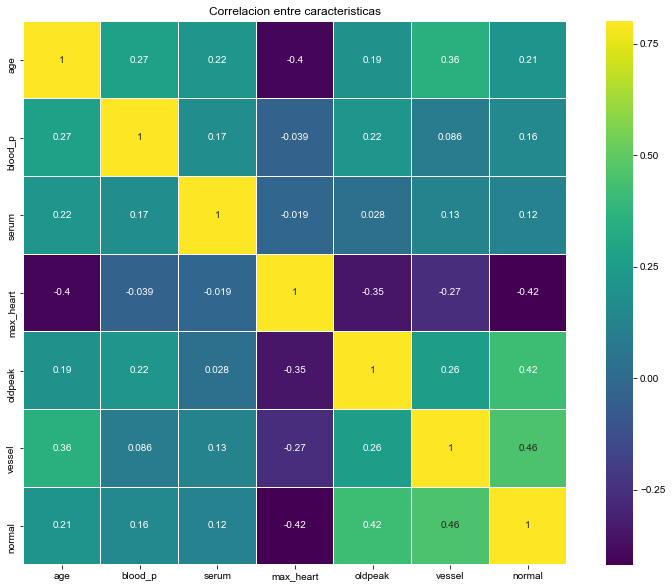

In [7]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlacion entre caracteristicas');
plt.show()

Esta gráfica muestra la correlación entre las características a estudiar. Cabe mencionar que solo se mide la correlación entre valores que son medibles cuantitativamente. Podemos notar que la variable con mayor correlación a la variable a predecir (normal) es vessel, mientras que el nivel de colesterol (senum) no esta fuertemente relacionado con la presencia de una enfermedad.

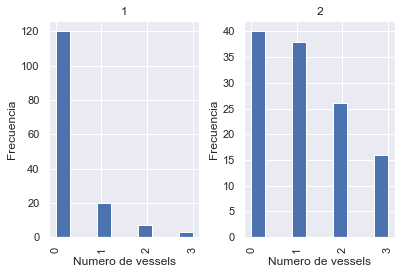

In [8]:
hist = df.hist(column='vessel', by='normal')
for ax in hist.flatten():
    ax.set_xlabel("Numero de vessels")
    ax.set_ylabel("Frecuencia")


Aca podemos ver dos histogramas de frecuencia del numero de vessels, uno para los pacientes sanos (1) y otros para los pacientes enfermos (2). Podemos notar que las personas sanas en su gran mayoria no poseen ningun vessel, mientras que los pacientes enfermos en su gran mayoria si presentan cantidades entre 0 y 3.


> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**


In [9]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Este paso es de vital importancia ya que en muchos de los algoritmos de machine learning no se pueden operar con datos representados como un label. Se requiere todos los inputs y outputs de forma numerica. Existen valores numericos que deben ser separados por categoria, para el cual se utiliza one hot encoding. Por ejemplo, si expresaramos sex en una sola categoria con valores 1 y 2, no tendria sentido calculos de medias, desviaciones, etc. Dado esto, existen atributos que deben ser separados por categoria utilizando valores binarios para la pertenencia del atributo en cuestión. 

### Predecir la presión sanguínea

En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.



In [10]:
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values

> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.
```python

In [11]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)


Train:  (184, 24)
Test:  (86, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)
print(Xstd_train)

[[ 1.6925911   1.29249516 -1.79283968 ... -0.26413527  0.90652202
  -0.79266549]
 [ 1.36139284  5.76291806  0.49427391 ... -0.26413527 -1.10311716
   1.26156621]
 [ 0.25739865  0.16565302 -0.35778802 ... -0.26413527 -1.10311716
   1.26156621]
 ...
 [-0.29459845 -0.97966194  0.58396464 ... -0.26413527 -1.10311716
   1.26156621]
 [ 0.14699923  0.77525615  0.18035636 ... -0.26413527  0.90652202
  -0.79266549]
 [ 1.36139284  0.62747357 -1.83768504 ... -0.26413527  0.90652202
  -0.79266549]]


La normalización de los datos a trabajar es importante dado que los atributos que se miden estan en escalas distintas, lo cual afecta a la hora de los resultados ya que al tener un mayor rango de valores para un atributo, este influiría más que uno que posea un rango más bajo de valores. Ejemplo de esto es la variable 'edad', la cual tiene rango entre 29 y 77 mientras que la variable 'serum' varia entre 126 y 564. Si no se normalizaran estas dos variables, el peso de esta última influiría más en el resultado que el atributo de edad.

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

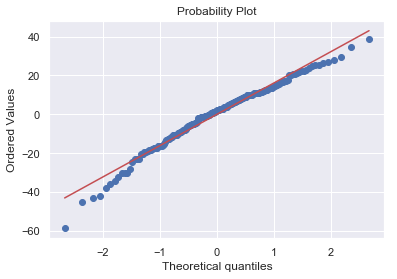

In [13]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True) 
model=model.fit(Xstd_train, reg_label_train)
reg_pred_train = model.predict(Xstd_train) 
reg_pred_test = model.predict(Xstd_test)
#print(reg_label_train)
#print(reg_pred_train)
residuo = reg_pred_train-reg_label_train
stats.probplot(residuo, dist="norm", plot=pylab)
pylab.show()
#print(reg_label_test)
#print(reg_pred_test)


Sí, es razonable la hipótesis de normalidad sobres los residuos del modelo dado que viendo la gráfica la recta se ajusta bien al modelo.


> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

In [14]:
train_df = pd.DataFrame(Xstd_train)
feat_mean = train_df.mean()
Z_score = []
F_score = []

#Se calcula la varianza
d = Xstd_train.shape[1]  #Cantidad de características
n = len(reg_label_train)
suma_varianza = 0
for i in range(n):
    suma_varianza += (reg_label_train[i] - reg_pred_train[i])**2


varianza_2 = (suma_varianza)/(n - d - 1)

for feature in range(d):
    suma_numerador = 0
    suma_denominador = 0
    suma_denominador2 = 0
    cont_y = 0
    for row in Xstd_train:
        a = row[feature] - feat_mean[feature]
        b = reg_label_train[cont_y] - reg_label_train.mean() 
        suma_numerador +=  (a*b)
        suma_denominador +=  (a**2)
        suma_denominador2 += (b**2)

        cont_y += 1
    Z_score_i= (suma_numerador / (varianza_2*(np.sqrt(suma_denominador))) )
    p_i = Z_score_i/ (np.sqrt(suma_denominador2))
    F_score.append((n-2)*(p_i**2)/(1 - (p_i)**2))
    Z_score.append(Z_score_i)

data = {}

data['Z_score']=Z_score
data['F_score']=F_score
data['variable'] = df.columns

df2 = pd.DataFrame(data=data)
df2 = df2.sort_values(by = ['Z_score'], ascending = False)
df2

,Z_score,F_score,variable
0,0.229716,1.596843e-04,age
3,0.170533,8.800303e-05,oldpeak
1,0.153252,7.107139e-05,serum
18,0.137959,5.759471e-05,slope_downsloping
11,0.137707,5.738405e-05,blood_s_greater than 120mg/ml
13,0.130871,5.182834e-05,electro_ST-T wave abnormality
14,0.111801,3.782456e-05,electro_left ventricular hypertrophy
5,0.092657,2.597974e-05,sex_female
23,0.057614,1.004474e-05,thal_reversable defect
4,0.055107,9.189607e-06,vessel


Z-score permite medir cuán correlacionados están los atributos con respecto a la variable a predecir y es un estadístico que se puede utilizar para realizar un contraste de hipótesis que permita seleccionar un conjunto de atributos relevantes respecto a un p valor. Al observar la tabla anterior, se puede deducir que los atributos 'age', 'oldpeak' y 'serum' son las tres más relevantes dado que poseen un valor mayor para Z-score.

 > h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MAE test: ", mean_absolute_error(reg_label_test, reg_pred_test))
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))

MAE train:  12.520139292308563
MAE test:  13.660613351999706
MSE train:  259.62929877777015
MSE test:  263.1851888628686


Se obtiene un menor error para el conjunto de entrenamiento dado que esos fueron los ejemplos que se le dieron al learner para que aprenda a realizar la predicción, buscando minimizar el error de clasificación. En cambio, el conjunto de test posee datos nuevos, para los cuales el clasificador debe realizar una predicción mediante una generalización de lo aprendido en el conjunto de entrenamiento. Por lo tanto, esta propenso a cometer más errores dado que además, tambien existe un ajuste a los datos de entrenamiento. Una forma de combatir esto sería tener una mayor cantidad de datos, sin embargo, pese a que existe un exceso de datos en esta época requiere mucho tiempo etiquetarlos. Es por esto que existen otras técnicas para combatir overfitting, como lo seria 'cross-validation'.

> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya

In [16]:
from sklearn.model_selection import KFold
list=[184,5]
list_results=[]
for K in list:
    kf = KFold(n_splits=K)
    mse_cv = 0
    for train, val in kf.split(Xstd_train):
        linreg = LinearRegression(fit_intercept=True)
        linreg.fit(Xstd_train[train], reg_label_train[train])
        yhat_kfold_val = linreg.predict(Xstd_train[val])
        mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
        mse_cv += mse_fold
    mse_cv = mse_cv / K
    list_results.append(mse_cv)
print("Mean-Square-Error para K=1 (leave-one-out) es:",list_results[0])
print("Mean-Square-Error para K=5 es:",list_results[1])

Mean-Square-Error para K=1 (leave-one-out) es: 337.62078104495396
Mean-Square-Error para K=5 es: 362.1008805407525


Podemos ver que el MSE es mayor al calculado anteriormente. Además, para el K=1 (mejor dicho, k=184) el error es menor que K=5 dado que hay mas iteraciones, por lo que el error tiende a disminuir. 


> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 

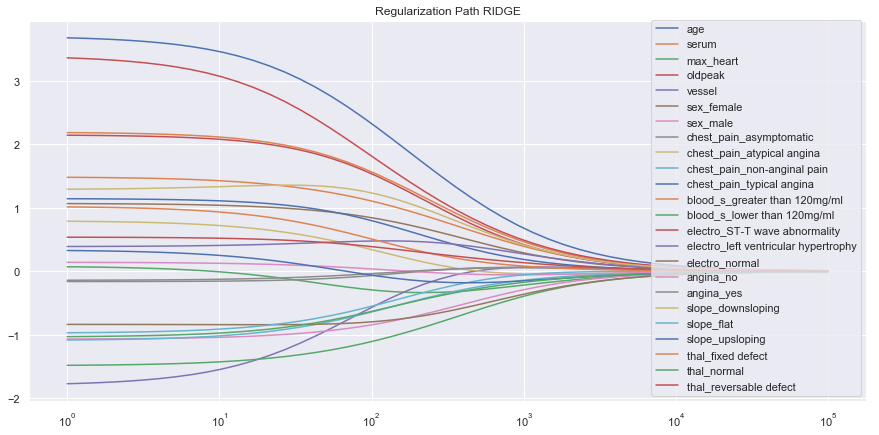

In [17]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

En la gráfica se observa cómo varía el valor de los coeficientes en función de alpha, siendo alpha la penalización que se le otorga al valor de los coeficientes. Se puede observar que los valores de los coeficientes tienden a 0 para valores altos de alpha, dado que se le estaría dando una importancia muy grande a la disminución de los coeficientes, lo cual los haría muy pequeños. Ridge Regression se debe utilizar para  coeficientes normalizados y su importancia recae en que si se escoge el valor óptimo de alpha (con cross validation), se puede disminuir el error cuadrático medio. Esto se consigue mediante una compensación varianza-sesgo, donde el valor de alpha aumenta el sesgo, pero disminuye la varianza. En el punto óptimo, la disminución de la varianza es tal, que se compensa con el aumento del sesgo y se tiene un error cuadrático medio menor. 


> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?


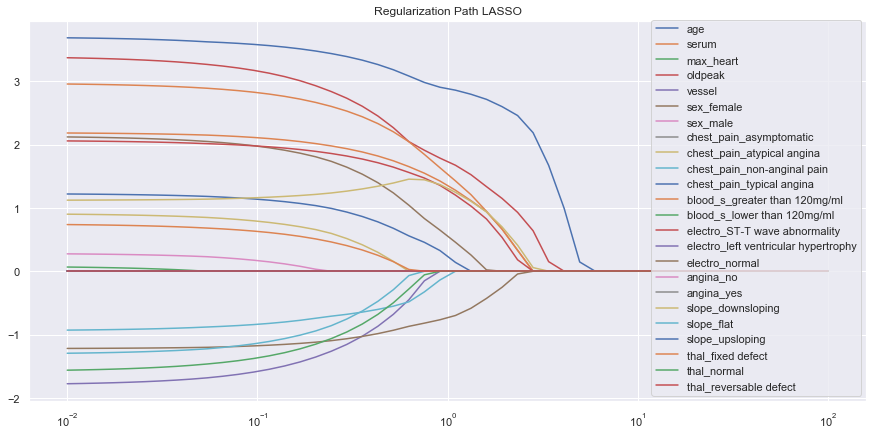

In [18]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

Sí, Lasso es más efectivo para la selección de atributos, dado que Ridge busca disminuir el peso de los atributos en lugar de realizar una selección. Esto se puede observar en su gráfica, donde los valores para cada atributo van disminuyendo, pero ninguno se hace cero antes que los otros. Lasso es quien tiene esta función y es evidente al observar su gráfica. Acá, a medida que aumenta el valor de lambda, se van truncando a cero los atributos que posean menos relevancia para el modelo. De este modo, mientras mayor es alpha, es menor la cantidad de atributos seleccionados (se van truncando más de ellos). Los atributos que se truncan más prematuramente son los de menor relevancia y aquellos que se truncan al último son los que entregan mayor información. Esto tiene bastante sentido, si tomamos por ejemplo la línea rosa que es la variable binaria que se activa cuando no se tiene angina (o dolor en el pecho), esta se trunca de forma muy prematura, lo cual es evidente dado que el dolor en el pecho es un síntoma claro de infarto cardiaco.  


> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?



In [19]:

def train_model(param,modelo):
    model = modelo(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max),modelo=[Lasso,Ridge])

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Dropdown(description='modelo',…

Para el caso de Lasso, con param igual a 1 ($10^1$) se llega al máximo valor de MSE, por lo que utilizar valores mayores no aporta en el caso de seleccionar atributos. Para el caso de Ridge, con param igual a 5 ($10^5$) es suficiente para la regularización del modelo, dado que al aumentar el valor la magnitud de MSE no varía significativamente.


> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

In [20]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    list_remaining = [*remaining]
    selected = []
    current_score = best_new_score = 0.0
    while len(list_remaining)!=5:
        score_candidates = []
        for candidate in list_remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        worst_score, worst_candidate = score_candidates.pop()
        list_remaining.remove(worst_candidate)
        #selected.append(best_candidate)
        print ("removed = %s ..."%names_x[worst_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),worst_score))
    for i in list_remaining:
        print ("selected = %s ..."%names_x[i])       
    return list_remaining
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
print(features_fss)

removed = slope_flat ...
totalvars=1, mse = 326.839837
removed = thal_fixed defect ...
totalvars=1, mse = 326.593108
removed = angina_yes ...
totalvars=1, mse = 326.093821
removed = angina_no ...
totalvars=1, mse = 326.093821
removed = chest_pain_atypical angina ...
totalvars=1, mse = 326.023541
removed = chest_pain_asymptomatic ...
totalvars=1, mse = 325.900985
removed = chest_pain_non-anginal pain ...
totalvars=1, mse = 325.870553
removed = chest_pain_typical angina ...
totalvars=1, mse = 325.533068
removed = vessel ...
totalvars=1, mse = 325.378282
removed = thal_normal ...
totalvars=1, mse = 324.592111
removed = slope_upsloping ...
totalvars=1, mse = 324.048333
removed = sex_male ...
totalvars=1, mse = 322.656183
removed = sex_female ...
totalvars=1, mse = 322.656183
removed = max_heart ...
totalvars=1, mse = 322.328917
removed = electro_left ventricular hypertrophy ...
totalvars=1, mse = 320.735842
removed = electro_ST-T wave abnormality ...
totalvars=1, mse = 318.465480
removed =


> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.



In [21]:
def fss2(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    list_remaining = [*remaining]
    selected = []
    current_score = best_new_score = 0.0
    score_candidates = []
    for candidate in list_remaining:
        model = LinearRegression(fit_intercept=True, n_jobs=1)
        indexes = selected + [candidate]
        x_train = x[:,indexes]
        predictions_train = model.fit(x_train, y).predict(x_train)
        residuals_train =  predictions_train - y
        error_candidate =  np.mean(np.power(residuals_train, 2))
        score_candidates.append((error_candidate, candidate))
    score_candidates.sort()
    for i in range(18):
        worst_score, worst_candidate = score_candidates.pop()
        list_remaining.remove(worst_candidate)
        #selected.append(best_candidate)
        print ("removed = %s ..."%names_x[worst_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),worst_score))
    for i in list_remaining:
        print ("selected = %s ..."%names_x[i])       
    return list_remaining
features_fss = fss2(Xstd_train, reg_label_train, names_regressors)
print(features_fss)

removed = slope_flat ...
totalvars=1, mse = 326.839837
removed = thal_fixed defect ...
totalvars=1, mse = 326.593108
removed = angina_yes ...
totalvars=1, mse = 326.093821
removed = angina_no ...
totalvars=1, mse = 326.093821
removed = chest_pain_atypical angina ...
totalvars=1, mse = 326.023541
removed = chest_pain_asymptomatic ...
totalvars=1, mse = 325.900985
removed = chest_pain_non-anginal pain ...
totalvars=1, mse = 325.870553
removed = chest_pain_typical angina ...
totalvars=1, mse = 325.533068
removed = vessel ...
totalvars=1, mse = 325.378282
removed = thal_normal ...
totalvars=1, mse = 324.592111
removed = slope_upsloping ...
totalvars=1, mse = 324.048333
removed = sex_male ...
totalvars=1, mse = 322.656183
removed = sex_female ...
totalvars=1, mse = 322.656183
removed = max_heart ...
totalvars=1, mse = 322.328917
removed = electro_left ventricular hypertrophy ...
totalvars=1, mse = 320.735842
removed = electro_ST-T wave abnormality ...
totalvars=1, mse = 318.465480
removed =

> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?

Index(['age', 'serum', 'max_heart', 'oldpeak', 'vessel', 'sex_female',
       'sex_male', 'chest_pain_asymptomatic', 'chest_pain_atypical angina',
       'chest_pain_non-anginal pain', 'chest_pain_typical angina',
       'blood_s_greater than 120mg/ml', 'blood_s_lower than 120mg/ml',
       'electro_ST-T wave abnormality', 'electro_left ventricular hypertrophy',
       'electro_normal', 'angina_no', 'angina_yes', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect', 'Fake1', 'Fake2', 'Fake3', 'Fake4', 'Fake5',
       'Fake6', 'Fake7', 'Fake8', 'Fake9', 'Fake10'],
      dtype='object')


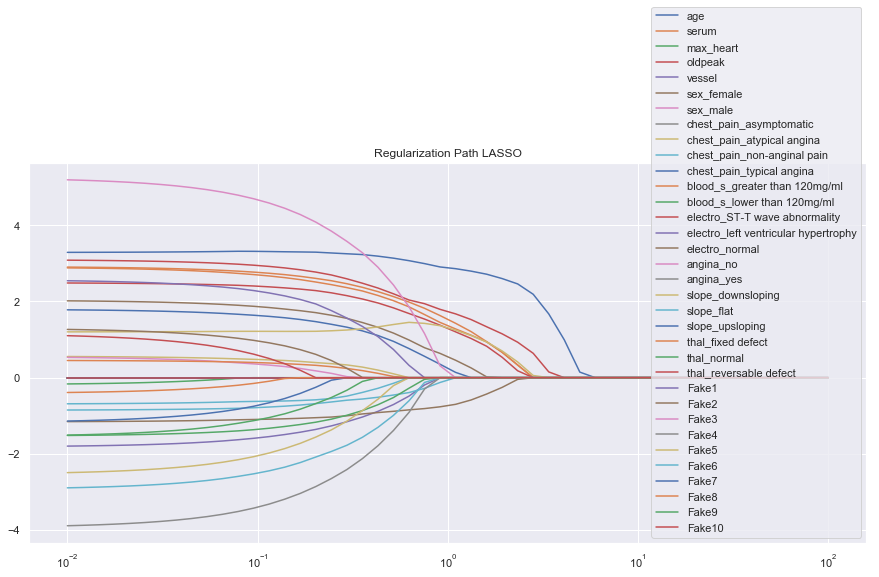

In [22]:
D = 10 #number of fake features
F = np.random.normal(loc = 1, scale = 0.5, size=(Xstd_train.shape[0],D)) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
df2 = pd.Index(['Fake1', 'Fake2', 'Fake3', 'Fake4','Fake5','Fake6', 'Fake7', 'Fake8', 'Fake9','Fake10']) 
names_regressors_new=names_regressors.append(df2)
print(names_regressors_new)
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors_new):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

Al trabajar con 10 atributos falsos podemos ver que los atributos más importantes (los valores que se demoran maás en truncar a cero) son los mismos que en la curva anterior de Lasso. A partir de esto podemos concluir que los atributos falsos creados no afectan en la elección de los atributos más correlacionados.



### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.

In [29]:
mask_norm = class_label_train == 0 
model = Ridge(fit_intercept=True)
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test)


> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).

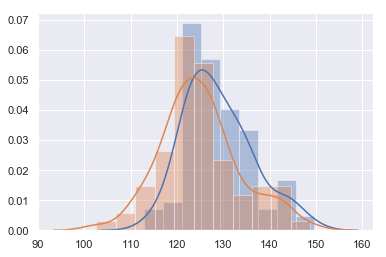

In [45]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, 150, 130)
pred_test = predict_umbr(blood_p_te, 150, 130)



> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*
```python
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```


In [46]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.5597826086956522
Score test:  0.5697674418604651


Dado el umbral anterior se obtuvo el mejor acuraccy usando estos parametros. Cabe mencionar que este sigue siendo bajo ya que como podemos ver en la gráfica la distribución es similar para ambos tipos de pacientes.


> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.

In [47]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 


Score train:  0.8695652173913043
Score test:  0.8023255813953488


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Podemos ver que el Perceptron es un mejor predictor para el modelo ya que para un modelo de Regresión la acuraccy practicamente es de un 50% ya que viendo las curvas en el gráfico anterior podemos notar que la distribución es similar para una persona normal y una persona enferma.


> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).

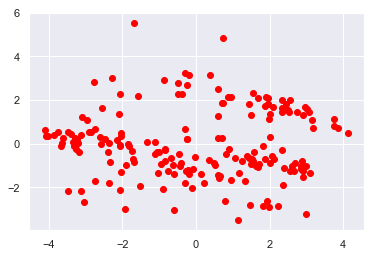

In [48]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1],color=['red'])
plt.show()

Podemos ver que los valores no se concentran en un lugar especifico, estando bastante separados cada uno de ellos. 


> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente


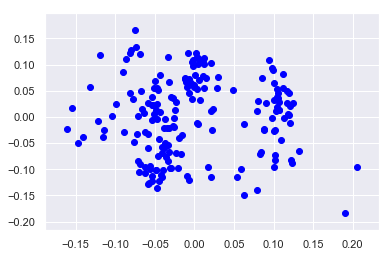

In [52]:
from sklearn.decomposition import FastICA
d = 2
FastICA_model = FastICA(n_components=d)
FastICA_model.fit(Xstd_train)
X_ica_train = FastICA_model.transform(Xstd_train)
X_ica_test = FastICA_model.transform(Xstd_test)
plt.scatter(X_ica_train[:,0],X_ica_train[:,1],color=['blue'])
plt.show()

En esta gráfica si podemos ver un cambio en la concentración de valores, observando que los puntos si se agrupan bastante juntos. Pese a esto, se puede seguir viendo valores (pacientes) que difieren de los valores concentrados en un lugar.


> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Hyvärinen, A., & Oja, E. (2000). *Independent component analysis: algorithms and applications*. Neural networks, 13(4-5), 411-430.